# PCA - Principal Component Analysis

El análisis de componentes principales (PCA), consiste en reducir la dimensionalidad de las variables que tienen relaciones estrechas o pueden llegar a guardar asociaciones ocultas que no son tan fáciles de detectar.

> PCA busca reducir el número de características, para un conjunto de características relacionadas entre sí

Cuando tenemos un conjunto de variables relacionadas que podrían interferir en el análisis unas con otras aumentando la dimensionalidad (número de variables de análisis), podemos optar por reducir la cantidad de variables a manipular, usando el algoritmo del PCA para detectar de todas esas variables, aquellas que tengan un mejor desempeño y partan como consecuencia de las otras. Por ejemplo, si tenemos diferentes esfuerzos calculados sobre nuestras muestras, los cuales guardan una estrecha similitud, podríamos construir un conjunto pequeño de variables que se infieran a partir de las otras.

> El PCA busca construir nuevas variables (componentes) que guarden la mínima varianza o correlación entre ellas y permitan inferir las otras variables (características) a partir de estas nuevas variables

Esto significa que una matriz de variables (por ejemplo 5 o 10 variables), que tienen un sentido común, se puede llevar a una matriz de variables más compacta (por ejemplo, 2 o 3).

El fondo del PCA es analizar la varianza y correlación entre las variables (covarianza) para construir un modelo nuevo de datos, los cuales tienen menos variables que las originales, usando la varianza para determinar que algunas variables pueden ser inferidas a partir de las otras.

> El PCA busca el hiperplano y = m1 * x1 + m2 * x2 + ... mn * xn
> que se transforme en hiperplano y = h1 * z1 + h2 * z2 + ... + hd * zd

Entonces pasamos de las variables `x1`, `x2`, `x3`, ..., `xn` a las variables `z1`, `z2`, ..., `zd`, dónde la `d` es menor a `n`.

In [2]:
import numpy as np
import pandas as pd

proyectos = pd.read_excel("data/ProyectosFinalizados.xlsx", sheet_name="base")

def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


## 1. Construir nuestra matriz de características a reducir

In [29]:
X = proyectos[ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V"] ].fillna(0).values

X[:5]

array([[ 404.5 ,  486.04,    0.  ,  404.5 ],
       [ 295.  ,  260.8 ,    0.  ,  295.  ],
       [1019.  ,  698.49,    0.  ,  565.13],
       [ 525.  ,  495.22,    0.  ,  525.  ],
       [ 213.  ,  105.16,    0.  ,  105.16]])

## 2. Construir un PCA con el número de componentes reducidos

Y ajustamos el PCA a los datos, para esta manera poder transformar cualquier matriz con el mismo número de características lo podemos reducir a solo los componentes solicitados.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

pca.explained_variance_ratio_

array([0.81937727, 0.10394137])

La razón de varianza indica que la última variable solo aporta una varianza casi 0, es decir, ya no aporta información, cuando los últimos componentes sean cercanos a cero, ya no vale la pena seguir incrementando el número de componentes.

Para espacios entre 5 y 100 variables, lo común es usar entre 2 y 10 componentes verificando que la razón de varianza decaiga rápidamente a niveles cero al final.

In [23]:
# Representa los autovalores que encontró para construir la matriz de proyección, ya que al final el PCA hace una proyección usando estos valores.
pca.singular_values_

array([169341.93131649,  60313.81108336])

In [30]:
X[:5]

array([[ 404.5 ,  486.04,    0.  ,  404.5 ],
       [ 295.  ,  260.8 ,    0.  ,  295.  ],
       [1019.  ,  698.49,    0.  ,  565.13],
       [ 525.  ,  495.22,    0.  ,  525.  ],
       [ 213.  ,  105.16,    0.  ,  105.16]])

In [36]:
X_transform = pca.transform(X)

X_transform[:5]

array([[-1231.3557328 ,    74.86302181],
       [-1493.6493469 ,   117.60901475],
       [ -667.33899848,   -26.98857794],
       [-1125.08379481,   -38.83559886],
       [-1704.93718224,   255.83342165]])

In [27]:
X.shape, X_transform.shape

((2955, 4), (2955, 2))

Con el PCA podemos llevar cualquier matriz de nx4 a nx2

In [28]:
pca.transform([
    [123, 125, 0, 128],
    [400, 450, 15, 410],
    [320, 300, 0, 300],
])

array([[-1737.93682894,   240.87927862],
       [-1258.72671248,    61.58959511],
       [-1447.70934863,   123.45902014]])

## 3. Un algoritmo toma la matriz X para aprender a clasificar el vector y

Por lo que podemos comparar que también hace el entrenamiento (clasificación), con la matriz original versus la matriz reducida.

Si el entrenamiento tiene el mismo desempeño, significará que nuestra matriz reducida es completamente equivalente. Incluso se puede dar el caso que el desempeño del algoritmo mejore bastante.

In [47]:
dataset = proyectos[ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V", "EFICIENCIA"] ]\

dataset = dataset.fillna(0)

dataset = dataset[ (dataset["EFICIENCIA"] > 0) ]
dataset = dataset[ (dataset["ESFUERZO_TOTAL_E"] > 0) ]

import numpy as np

dataset["EFICIENCIA_BUENA"] = dataset["EFICIENCIA"] > np.quantile(dataset["EFICIENCIA"], 0.4)

dataset.head()

,ESFUERZO_TOTAL_P,ESFUERZO_TOTAL_R,ESFUERZO_TOTAL_E,ESFUERZO_TOTAL_V,EFICIENCIA,EFICIENCIA_BUENA
889,638.5,638.18,217.0,581.10,0.650492,True
890,8046.0,5898.31,2428.0,5865.29,0.801831,True
893,1745.0,1616.91,191.0,1593.76,0.349970,False
899,1875.5,2030.73,503.0,1929.85,0.641147,True
911,451.5,418.16,239.0,418.16,1.083333,True


In [48]:
X = dataset[ ["ESFUERZO_TOTAL_P", "ESFUERZO_TOTAL_R", "ESFUERZO_TOTAL_E", "ESFUERZO_TOTAL_V"] ].values

X[:5]

array([[ 638.5 ,  638.18,  217.  ,  581.1 ],
       [8046.  , 5898.31, 2428.  , 5865.29],
       [1745.  , 1616.91,  191.  , 1593.76],
       [1875.5 , 2030.73,  503.  , 1929.85],
       [ 451.5 ,  418.16,  239.  ,  418.16]])

In [49]:
y = dataset["EFICIENCIA_BUENA"].values.astype(int)

y[:5]

array([1, 1, 0, 1, 1])

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X, y, scoring="accuracy").mean()

0.6783439277350285

La clasificación anterior se logró usando 4 variables, es decir, el entrenamiento (el árbol de decisión) usó la información de 4 variables para determinar la clase (si la eficiencia será buena).

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

X_transform = pca.transform(X)

X_transform[:5]

array([[-1328.98620327,   -29.39179435],
       [ 8633.87754127,  3541.55181532],
       [  292.03736608,   674.23913587],
       [  804.35224532,   868.20861715],
       [-1638.6764492 ,  -125.34561161]])

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X_transform, y, scoring="accuracy").mean()

0.5588156574105051

Cuando reducimos las 4 características a 2 componentes, el árbol de decisión bajó considerablemente su rendimiento de 68% a 56%

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(X)

X_transform_2 = pca.transform(X)

X_transform_2[:5]

array([[-1328.98620327,   -29.39179435,  -238.95848307],
       [ 8633.87754127,  3541.55181532,   887.0973496 ],
       [  292.03736608,   674.23913587,  -477.40307876],
       [  804.35224532,   868.20861715,  -307.00695758],
       [-1638.6764492 ,  -125.34561161,  -166.42592618]])

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X_transform_2, y, scoring="accuracy").mean()

0.6930812980930077

Pero si consideramos 3 componentes, aunque es casi el mismo número de variables, para el algoritmo hay un mayor rendimiento, ya que aunque son 3 variables nuevas, estas tienen la mínima correlación entre sí, por lo que podemos decir, que son variables superiores en el sentido de discriminación que las originales, es decir, el árbol de decisión toma mejores decisiones con estas 3 variables que con las originales. Llegando a casi el 70% de predicción.

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca.fit(X)

X_transform_3 = pca.transform(X)

X_transform_3[:5]

array([[-1328.98620327,   -29.39179435,  -238.95848307,    59.81697775],
       [ 8633.87754127,  3541.55181532,   887.0973496 , -1379.945096  ],
       [  292.03736608,   674.23913587,  -477.40307876,  -109.71536412],
       [  804.35224532,   868.20861715,  -307.00695758,   153.82248369],
       [-1638.6764492 ,  -125.34561161,  -166.42592618,    65.74055103]])

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X_transform_2, y, scoring="accuracy").mean()

0.6848946135831382

Es muy probable que al convertir las variables a componentes, es decir, pasar de un espacio a otro, mejoren los algoritmos de clasificación o demás, porque el nuevo espacio es adimensional, y se basa únicamente en los valores principales (autovalores) que son independientes de las unidades en las que funciona cada variable.

## EJERCICIO

Construir una matriz `X` con todas las variables de esfuerzo (ESFUERZO_TOTAL_P, ESFUERZO_TOTAL_R, ESFUERZO_TOTAL_E, ESFUERZO_TOTAL_V, ESF_PLANEACION_P, ESF_PLANEACION_R, ESF_PLANEACION_V, ESF_ELICITACION_P, ESF_ELICITACION_R, ESF_ELICITACION_E, ESF_ELICITACION_V, ESF_DOCUMENTACION_P, ESF_DOCUMENTACION_R, ESF_DOCUMENTACION_E, ESF_DOCUMENTACION_V, ESF_ARQUITECTURA_P, ESF_ARQUITECTURA_R, ESF_ARQUITECTURA_E, ESF_ARQUITECTURA_V, ESF_CODIFICACION_P, ESF_CODIFICACION_R, ESF_CODIFICACION_E, ESF_CODIFICACION_V, ESF_PRUEBAS_P, ESF_PRUEBAS_R, ESF_PRUEBAS_E, ESF_PRUEBAS_V,ESF_IMPLEMENTACION_P, ESF_IMPLEMENTACION_R, ESF_IMPLEMENTACION_V)

> Nota: Puedes descartar los esfuerzos tipo `E` y `V` si lo deseas y hacer las segmentaciones que consideres necesarias.

Para predecir la columna `PDR_BUENO`.

Probar la clasificación del `PDR_BUENO` usando `X`, `X_transform_2c`, `X_transform_3c`, `X_transform_5c`, `X_transform_10c`.

## Ejemplo

In [1]:
import pandas as pd
import numpy as np

s1 = np.random.normal(5, 0.1, 100)
s2 = np.random.normal(10, 0.3, 100)
s3 = np.random.normal(200, 20.78, 100)
s4 = np.random.normal(50, 4.5, 100)
s5 = np.random.normal(82, 1.2, 100)

dataset = pd.DataFrame({
    "A": s1,
    "B": s2,
    "C": s3,
    "D": s4,
    "E": s5
})

dataset

,A,B,C,D,E
0,4.968735,10.018725,218.082241,56.549588,80.860173
1,4.902188,10.258932,213.099288,51.860621,82.915724
2,4.956996,10.310052,192.147469,48.926138,81.200187
3,4.978166,10.554743,189.062452,53.013597,80.415008
4,5.002051,10.073403,211.071386,50.449121,82.082565
...,...,...,...,...,...
95,5.089590,10.048001,161.202881,48.059078,82.483759
96,4.908201,9.764121,244.511597,48.822394,80.508745
97,5.073827,10.093522,219.873349,47.608170,85.956524
98,5.009314,9.635727,214.123866,46.603610,82.510455


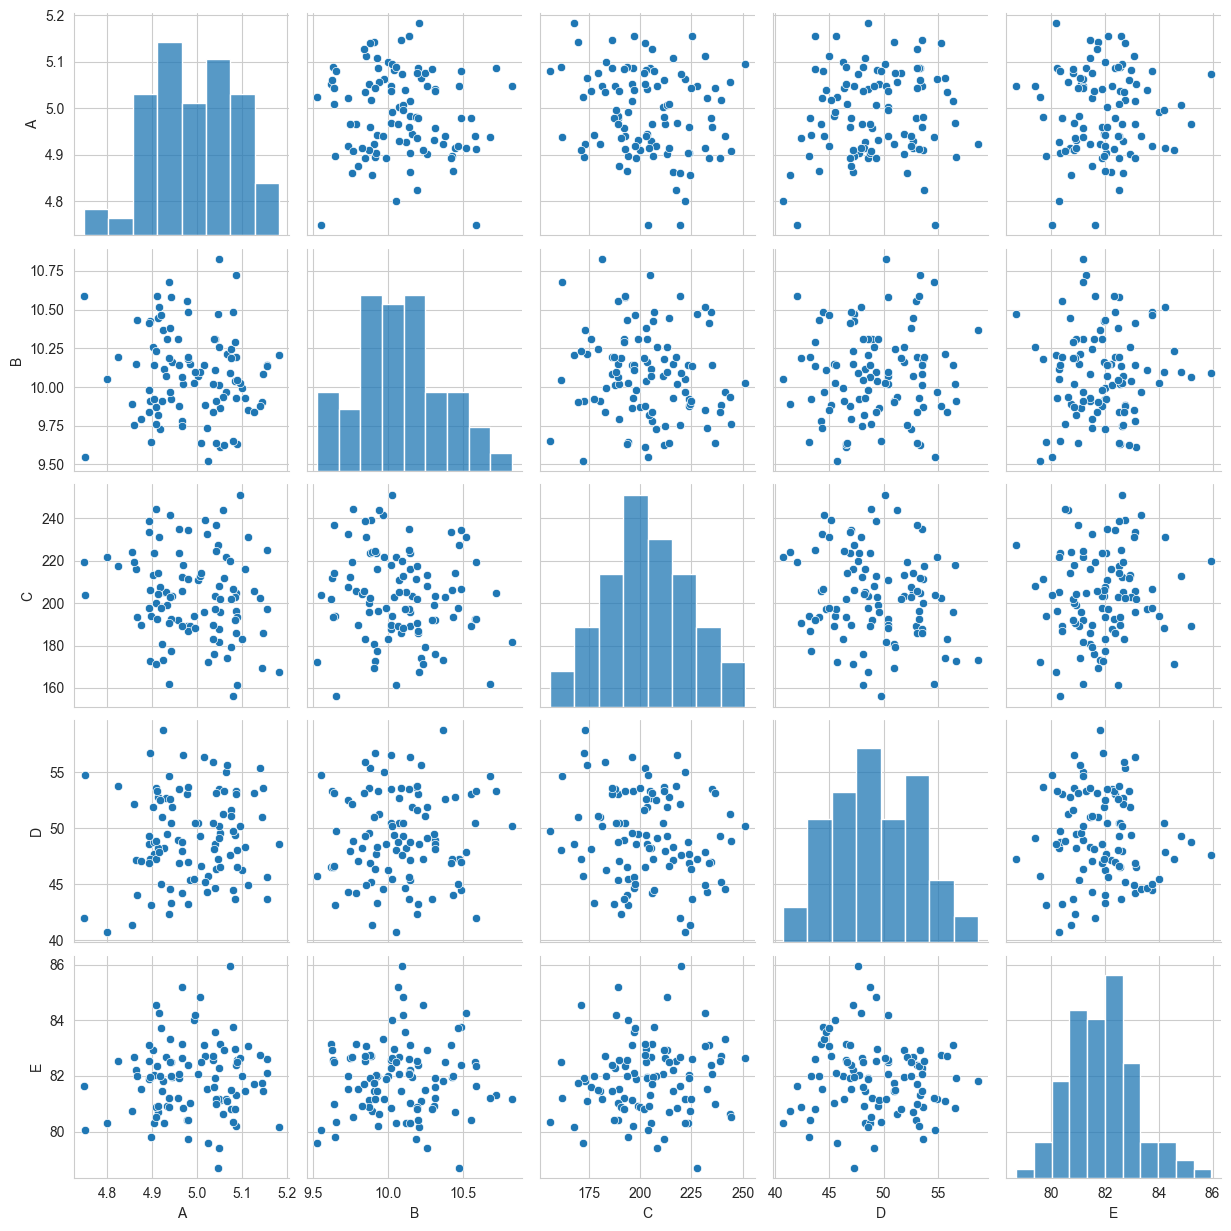

In [2]:
import seaborn as sns

sns.pairplot(dataset)

In [6]:
dataset["Y"] = (3 * dataset["A"] + 2 * dataset["B"] + 1.5 * dataset["C"] + dataset["D"] * dataset["E"]) / 5000

dataset

,A,B,C,D,E,Y
0,4.968735,10.018725,218.082241,56.549588,80.860173,0.986935
1,4.902188,10.258932,213.099288,51.860621,82.915724,0.930987
2,4.956996,10.310052,192.147469,48.926138,81.200187,0.859305
3,4.978166,10.554743,189.062452,53.013597,80.415008,0.916545
4,5.002051,10.073403,211.071386,50.449121,82.082565,0.898551
...,...,...,...,...,...,...
95,5.089590,10.048001,161.202881,48.059078,82.483759,0.848253
96,4.908201,9.764121,244.511597,48.822394,80.508745,0.866330
97,5.073827,10.093522,219.873349,47.608170,85.956524,0.891490
98,5.009314,9.635727,214.123866,46.603610,82.510455,0.840154


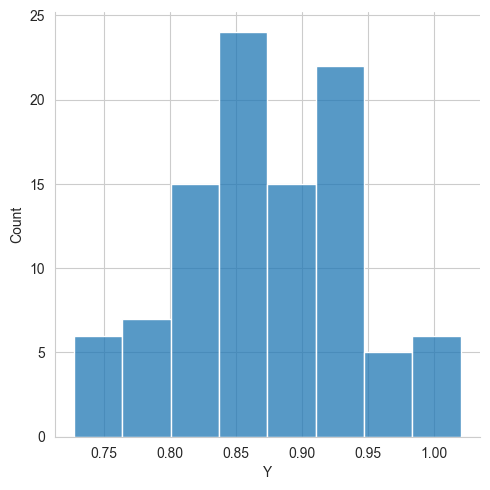

In [8]:
sns.displot(dataset["Y"])

In [13]:
dataset["Y_BUENA"] = dataset["Y"] > np.quantile(dataset["Y"], 0.75)

y = dataset["Y_BUENA"].values.astype(int)

y[:5]

array([1, 1, 0, 0, 0])

In [12]:
X = dataset[ ["A", "B", "C", "D", "E"] ].values

X[:5]

array([[  4.96873469,  10.01872457, 218.08224056,  56.54958791,
         80.86017347],
       [  4.90218844,  10.25893216, 213.09928839,  51.8606214 ,
         82.91572412],
       [  4.95699616,  10.31005152, 192.14746901,  48.92613791,
         81.20018741],
       [  4.97816579,  10.55474334, 189.0624524 ,  53.01359739,
         80.41500754],
       [  5.00205108,  10.07340287, 211.07138608,  50.44912062,
         82.08256516]])

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X, y, scoring="accuracy").mean()

0.9400000000000001

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_transform = pca.fit_transform(X)

X_transform[:5]

array([[ 14.28632116,   7.80134063],
       [  9.47673729,   2.90583722],
       [-11.37128722,  -0.71059391],
       [-14.59851226,   3.28364678],
       [  7.49418747,   1.4419671 ]])

<Axes: >

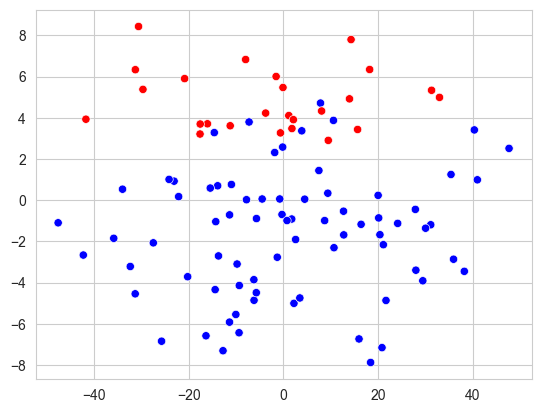

In [20]:
colors = list(map(lambda yi: "red" if yi == 1 else "blue", y))

sns.scatterplot(x=X_transform[:,0], y=X_transform[:,1], color=colors)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(), X_transform, y, scoring="accuracy").mean()

0.9099999999999999

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

cross_val_score(MLPClassifier(), X_transform, y, scoring="accuracy").mean()

D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\conda\envs\deep-learning\lib\site-packages\sklearn\neural

0.9099999999999999

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel="linear"), X_transform, y, scoring="accuracy").mean()

0.93